# Wine Quality Data




### Summary of Data:

- The Wine Quality Data are collected on Vinho Verde, a Portuguese wine product and stored in the [UCL Machine Learning Repository](https://archive.ics.uci.edu/dataset/186/wine+quality).
    
- Two separate datasets are included for the variants of the Vinho Verde wine, one for red wine and one for white wine.
- For this project, **only the red wine dataset will be used for analysis.** 
    - Since the standards of taste quality are different among red and white wine [[1]](http://www3.dsi.uminho.pt/pcortez/wine5.pdf), so discarding the white wine data should not affect the trustworthy and accuracy of the anaylysis on the quality of red wine.


### Data Description:

- 1599 observations are included in the red wine dataset. 
    
- Each observation contains 12 variables in total. 

    - 11 input variables that might have influences on wine's quality. Values of each input variable indicates physiochemical test results.
    - 1 output variable measuring the subjective sensory rating.

#### Input variables (based on physicochemical tests):

1. Fixed acidity: continuous variable with no missing values. 
    - Also refers to tartaric acid. 
    - One of the primary acids found in wine grapes.[[2]](https://en.wikipedia.org/wiki/Acids_in_wine)
2. Volatile acidity: continuous variable with no missing values.
    - Also refers to acetic acid.
    - Organic acid produced in wine during or after the fermentation period.[[2]](https://en.wikipedia.org/wiki/Acids_in_wine)
    - Responsible for the sour taste of vinegar. [[2]](https://en.wikipedia.org/wiki/Acids_in_wine)
3. Citric acid: continuous variable with no missing values.
    - commonly found in citrus fruits, such as limes. [[2]](https://en.wikipedia.org/wiki/Acids_in_wine)
    - commonly used in wines as commercially produced acid supplements. [[2]](https://en.wikipedia.org/wiki/Acids_in_wine)
4. residual sugar: continuous variable with no missing values.
    - natural grape sugars leftover in a wine after fermentation. [[3]](https://winefolly.com/deep-dive/what-is-residual-sugar-in-wine/)
5. chlorides: continuous variable with no missing values.
    - indicative of the presence of sodium chloride, which adds to the saltiness of a wine. [[4]](https://mantech-inc.com/wp-content/uploads/2014/07/105-Chloride-in-Wine-by-Titration.pdf)
6. free sulfur dioxide: continuous variable with no missing values.
    - molecular form to help protect the wine from oxidation and spoilage. [[5]](https://www.extension.iastate.edu/wine/total-sulfur-dioxide-why-it-matters-too/)

7. total sulfur dioxide: continuous variable with no missing values.
    -  molecular form to help protect the wine from oxidation and spoilage. [[5]](https://www.extension.iastate.edu/wine/total-sulfur-dioxide-why-it-matters-too/)

8. density: continuous variable with no missing values.

9. pH: continuous variable with no missing values.
    - measures the quantity of acids present. [[6]](https://www.coleparmer.com/tech-article/measuring-ph-in-wine-making#:~:text=pH%20measures%20the%20quantity%20of,the%20amount%20of%20potassium%20present.)
10. sulphates: continuous variable with no missing values.
    - produced by yeast that are used in the process of wine fermentation. [[7]](https://www.webmd.com/diet/what-to-know-sulfites-in-wine)
11. alcohol: continuous variable with no missing values.
   
#### Output variable (based on sensory data): 

12. quality: an integer on an ordinal scale, ranging from 0 to 10.
    - sensory rating by human experts


### Data collection & Process:

- The data were collected from May/2004 to February/2007 using only protected designation of origin samples that were tested at the CVRVV, an inter-professional organization with the goal of improving the quality and marketing of vinho verde. [[1]](http://www3.dsi.uminho.pt/pcortez/wine5.pdf)

- The data were recorded using a computerized system (iLab), which automatically records the labotory physiochemical tests and sensory data for each sample test.[[1]](http://www3.dsi.uminho.pt/pcortez/wine5.pdf) 

- The data were then split into red and white wine dataset.

- For input variables, only the most common physiochemical tests were used to avoid discarding samples.[[1]](http://www3.dsi.uminho.pt/pcortez/wine5.pdf)

- For output variable, each sample was evaluated by a minimum of three human expert tasters using blind tastes, and the ouput score was calculated using the median of the evaluations.[[1]](http://www3.dsi.uminho.pt/pcortez/wine5.pdf)

# Project Question:

Which physicochemical variables are associated with the quality of red wine?

### Variables:

- Response Variable: Quality
- Explanatory Variables: Fixed acidity, residual sugar, alcohol.

### Explanation:
At the current stage, three explanatory variables, fixed acidity, residual sugar, and alcohol, that might be related to the quality of red wine will be tested to try to answer the project question. These three variables are being picked first because fixed acidity might be an indicator of the acidity taste of a red wine, residual sugar suggests how sweet the red wine is, and alcohol informs how strong the red wine is.

The data could help to address the question of interest because it provided data on features that might influence on the quality rating of red wines and collected basic physicochemical laboratory test results that are used in the wine certification process for these features. The data also recorded the median human sensory ratings for each sample, where we could use the test results and sensory data to study the relationship between the subjective quality of a red wine and the variables of our interest easily. 

Moreoever, since the data provides 11 features that might be related to the quality of red wines, if the three explanatory variables we have chosen do not give meaningful results, we could explore more variables to find out the answer to our research question.


The research question is an inference and estimation question because we try to find the assotiation between variables using a sample and use the sample to infer to the true population.

# Exploratory Data Analysis and Visualization

In [56]:
library(tidyverse)
library(readr)
library(tidyr)
library(GGally)
library(ggplot2)
library(dplyr)
library(broom)
library(tidymodels)
library(boot)
library(glmnet)
library(caret)
library(pROC)

## Cleaning and Wrangling Data:

In [2]:
# read the data
read_red_wine <- read_csv("https://raw.githubusercontent.com/Rz02/STAT_301_Group_38/main/Data/winequality-red.csv")

red_wine <- separate(read_red_wine, `fixed acidity;volatile acidity;citric acid;residual sugar;chlorides;free sulfur dioxide;total sulfur dioxide;density;pH;sulphates;alcohol;quality`, into = c("fixed_acidity", "volatile_acidity", "citric_acid",
                                                                          "residual_sugar", "chlorides","free_sulfur_dioxide",
                                                                          "total_sulfur_dioxide","density","pH","sulphates",
                                                                          "alcohol","quality"), sep = ";")

# Get rid of the quotation marks around the cells, turn numerical columns from chr to numerical data
red_wine <- red_wine %>%
  mutate_if(is.character, as.numeric)


# Since the response variable "quality" is ordinal data, we turn it into factors 
red_wine$quality <- factor(red_wine$quality)

Rows: 1599 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): fixed acidity;volatile acidity;citric acid;residual sugar;chlorides...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
head(red_wine)

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


In [4]:
# check the data types of each column
glimpse(red_wine)

Rows: 1,599
Columns: 12
$ fixed_acidity        <dbl> 7.4, 7.8, 7.8, 11.2, 7.4, 7.4, 7.9, 7.3, 7.8, 7.5…
$ volatile_acidity     <dbl> 0.700, 0.880, 0.760, 0.280, 0.700, 0.660, 0.600, …
$ citric_acid          <dbl> 0.00, 0.00, 0.04, 0.56, 0.00, 0.00, 0.06, 0.00, 0…
$ residual_sugar       <dbl> 1.9, 2.6, 2.3, 1.9, 1.9, 1.8, 1.6, 1.2, 2.0, 6.1,…
$ chlorides            <dbl> 0.076, 0.098, 0.092, 0.075, 0.076, 0.075, 0.069, …
$ free_sulfur_dioxide  <dbl> 11, 25, 15, 17, 11, 13, 15, 15, 9, 17, 15, 17, 16…
$ total_sulfur_dioxide <dbl> 34, 67, 54, 60, 34, 40, 59, 21, 18, 102, 65, 102,…
$ density              <dbl> 0.9978, 0.9968, 0.9970, 0.9980, 0.9978, 0.9978, 0…
$ pH                   <dbl> 3.51, 3.20, 3.26, 3.16, 3.51, 3.51, 3.30, 3.39, 3…
$ sulphates            <dbl> 0.56, 0.68, 0.65, 0.58, 0.56, 0.56, 0.46, 0.47, 0…
$ alcohol              <dbl> 9.4, 9.8, 9.8, 9.8, 9.4, 9.4, 9.4, 10.0, 9.5, 10.…
$ quality              <fct> 5, 5, 5, 6, 5, 5, 5, 7, 7, 5, 5, 5, 5, 5, 5, 5, 7…


In [5]:
# check if there's any missing values
sum(is.na(red_wine))

[1] 0

As described in the data description section, this dataset contains 11 continuous explanatory variables, and 1 ordinal response variable. There are no missing values in this dataset.

## Proposal of Visualization:

- **Bar Graph**: to observe the distribution of the ordinal response variable, quality.
> **Explanation**: Since quality is ordinal data, a bar graph helps us to visualize the distribution of this variable and identify **which level is the most frequent and whether all levels are present in the dataset**.

- **Combo Scatter Plots**: to observe the relationships between multiple physiochemical tests (explanatory variables) and the quality of red wine (response variable)
> **Explanation**: Scatterplots help us to observe the relationship between the explanatory variables and the response variable. It also helps us identify whether a linear model would be a good fit and whether any transformation is needed in further anaylysis.  A combo scatter plots allows us to visualize the relationships all at once. If the **relationship between each physiochemical test and quality is not linear, models such as logistic regression can be used for analysis to better answer the research question**.


- **Heat Map**: to observe more detailed relationships between physiochemical tests. 
> **Explanation**: A heat map helps us to identify whether **two physiochemical tests have postive or negative relationship and whether there exists multicollinearity problem** since correlations between each variables will also be shown. For physiochemical tests that are highly correlated, we could consider to drop these variables in further analysis to solve the multicollinearity problem.

### 1. Bar Graph:

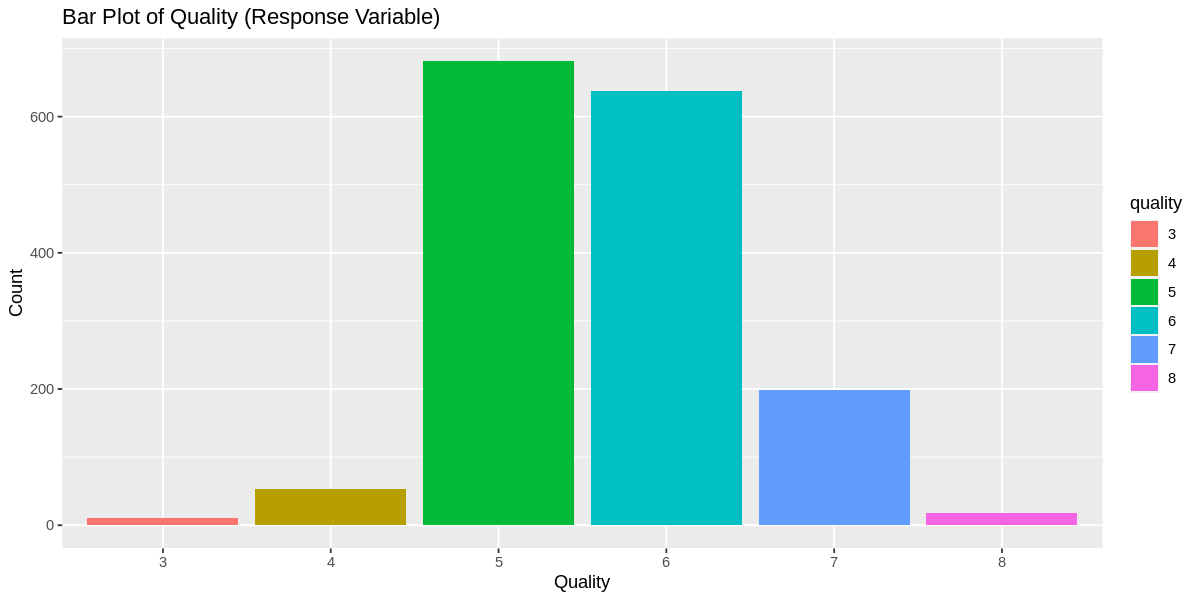

In [6]:
options(repr.plot.width = 10, repr.plot.height = 5)
ggplot(red_wine, aes(x = quality, fill = quality)) +
  geom_bar() +
  labs(title = "Bar Plot of Quality (Response Variable)",
       x = "Quality",
       y = "Count")

Red wines that have quality of 5 and 6 are the most common in this dataset. We can observe that this dataset only contains red wines that have quality range from 3 to 8. In other words, we do not expect to see information on red wines that have quality range from 0 to 2 nor red wines that have quality from 9 to 10 in this dataset. 

### 2. Scatter Plots:

* note: due to capacity constraint, taking all 12 variables all at once in pairs() result in kernel failure since there are too many combinations of variables. Therefore, the original red_wine data is split into two sets for visualization, each set contains different physiochemical tests with quality. Two sets of scatter plots will be created to visualize the relationships between each physiochemical test and the quality of the red wine.

Based on the two sets of scatterplots, we can observe that the relationship between each physiochemical test and the quality of red wine is not linear. Therefore, a linear regression model would not be the best model for this analysis.

Also, pairs() is used to create the series of scatterplots as it is convinient to plot the relationship between each of the 11 explanatory variables and the target variable. Pairs() is used instead of ggpairs() since it provides clearer visualizations for the relationship between each physiochemical test and the quality of the red wine. Although pairs() can be more difficult to interpret, given the fact that our goal for this visualization is to study the relationship between explanatory variables and the response variable, pairs() is preferred.

### 3. Heat Map:

In [7]:
corr_matrix <- red_wine %>%
  select(- quality) %>% 
  cor() %>%
  as.data.frame() %>%
  rownames_to_column("var1") %>%
  pivot_longer(-var1, names_to = "var2", values_to = "corr")
head(corr_matrix)

var1,var2,corr
<chr>,<chr>,<dbl>
fixed_acidity,fixed_acidity,1.00000000
fixed_acidity,volatile_acidity,-0.25613089
fixed_acidity,citric_acid,0.67170343
fixed_acidity,residual_sugar,0.11477672
fixed_acidity,chlorides,0.09370519
fixed_acidity,free_sulfur_dioxide,-0.15379419


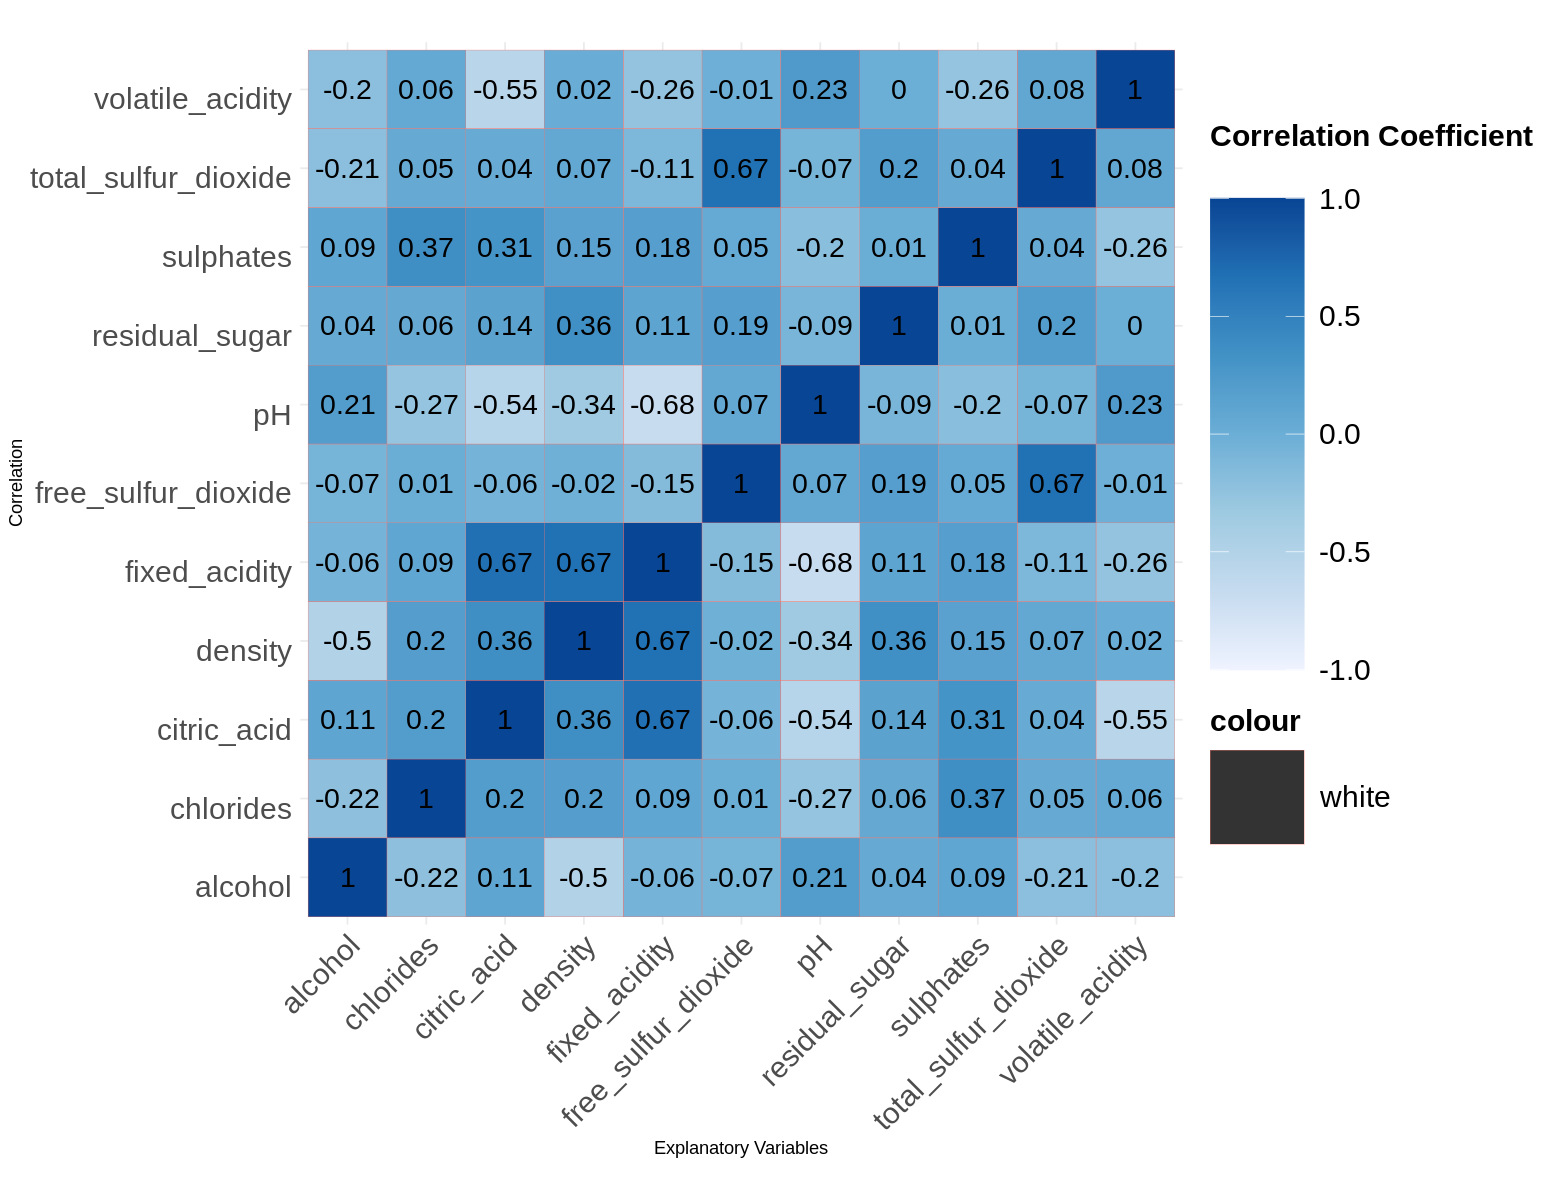

In [8]:
options(repr.plot.width = 13, repr.plot.height = 10)
plot_corr_matrix <- corr_matrix %>%
  ggplot(aes(var1, var2)) +
  geom_tile(aes(fill = corr, color = "white")) +
  scale_fill_distiller("Correlation Coefficient \n",
    palette = "Blues",
    direction = 1, limits = c(-1,1)
  ) +
  labs(x = "Explanatory Variables", y = "Correlation") +
  theme_minimal() +
  theme(
    axis.text.x = element_text(
      angle = 45, vjust = 1,
      size = 18, hjust = 1
    ),
    axis.text.y = element_text(
      vjust = 1,
      size = 18, hjust = 1
    ),
    legend.title = element_text(size = 18, face = "bold"),
    legend.text = element_text(size = 18),
    legend.key.size = unit(2, "cm")
  ) +
  coord_fixed() +
  geom_text(aes(var1, var2, label = round(corr, 2)), color = "black", size = 6)
plot_corr_matrix

- some physiochemical tests have positive relationships with each other while some have negative relationships with each other.

- There is multicollinear problem in this dataset as some physiochemical tests are correlated with each other.
    - highly positively correlated: total_sulfur_dioxide & free_sulfur_dioxide, fixed_acidity & citric_acid, fixed_acidity & density
    - highly negatively correlated: fixed_acidity & pH
    
Based on the result, fixed_acidity is highly correlated with many other physiochemimcal tests. Therefore, we could consider to drop fixed_acidity in later stage of the analysis to solve the multicollinear problem. A more detailed analysis such as vif can also be used to verify this interpretation as well. For free and total sulfur dioxide, since total sulfur dioxide is the sum of free sulfur dioxide and another kind of sulfur dioxide called bounded sulfur dioxide, we could consider to drop free_sulfur_dioxide and leave total_sulfur_dioxide as a variable since it provides more information than free_sulfur_dioxide. [[8]](https://www.wineshopathome.com/understanding-sulfur-levels-wine/#:~:text=Free%20Sulfur%20or%20FSO2&text=The%20term%20%E2%80%9Ctotal%20SO2%E2%80%9D%20refers,how%20much%20SO2%20to%20add.)

### To Conclude:

Given that the response variable is ordinal and the relationship between each physiochemical test and the quality of the red wine is not linear, a linear model would not be the best choice to answer the research question. Instead, logistic regression can be used. Given that logistic regression only takes response variable that has two levels, but our response variable quality has 6 levels in this dataset, so tranformation on quality is needed for further analysis. By observing the bar graph, one possible tranformation is to divide the 6 levels of quality into two levels, "high" and "low" where "high" is quality of red wines greater than 5 and "low" is quality of red wines smaller or equal to 5. Moreover, based on the heat map, explanatory variables fixed_acidity and free_sulfur_dioxide can be dropped for further analysis since they are highly correlated with other variables.

# Assignment 3: Methods and Plan

### Method:    
        As explained previously, a non-linear model, logistic regression, is proposed at the current stage to address which physicochemical variables are associated with the quality of red wine. Logistic regression is considered appropriate because the response variable in the dataset, quality, is an ordinal or categorical data. 
    
        The potential limitation of this method is that logistic regression requires the response variable to be binary. However, the response variable in the red wine data has 6 levels. Therefore, it is necessary to transform the response variable into binary form, either high or low. By looking at the bar graph, we could categorize qualities that are less or equal to 5 as ‘low’ and the ones that are higher than 5 as ‘high’. By doing transformation, we could get a response variable with two classes, each with a similar number of observations, which potentially avoids class imbalance. The number of observations in each class is also large enough for the model to learn useful patterns. However, the weakness that arises is that it is uncertain whether splitting the data equally into ‘high’ and ‘low’ is appropriate or not since we do not have any theoretical or statistical information indicating which quality levels should be classified as high or low.

### Plan:
        Before implementing logistic regression, the heat map result will be used first to identify input variables that are highly correlated with other input variables to avoid multicollinearity problems. Also, additional analysis and visualizations will be conducted to check if the assumptions for logistic regression are met. Variables identified by the heat map will not be used in further analysis. Several models will be created using different input variables, and after implementing logistic regression, tests will be used to examine the significance of coefficients for each model. Metrics will also be used to assess how well the models fit the data.


# Implementation of a proposed model

### - Mutate the Response Variable into Binary Form

In [9]:
red_wine_df <- red_wine %>%
               mutate(quality = as.character(quality))

red_wine_df <- red_wine_df %>% 
            mutate(quality = ifelse((quality > 5), 1,0))
head(red_wine_df)

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,0
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,0
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,0
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,1
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,0
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,0


### - Model Using the Three Variables Proposed (fixed_acidity, residual_sugar, and alcohol).

In [10]:
set.seed(1234)

red_wine_split <- initial_split(red_wine_df, prop = 0.6, strata = quality)
training_red_wine <- training(red_wine_split)
testing_red_wine <- testing(red_wine_split)

In [11]:
head(training_red_wine, 3)
nrow(training_red_wine)

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7.4,0.70,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,0
7.8,0.88,0,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,0
7.4,0.70,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,0


[1] 959

In [12]:
head(testing_red_wine, 3)
nrow(testing_red_wine)

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,0
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,1
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,0


[1] 640

In [13]:
default_quality_model <- 
  glm(formula = quality~fixed_acidity+residual_sugar+alcohol,
       data = training_red_wine,
       family = binomial)

default_quality_model_results <- 
  tidy(default_quality_model, conf.int = TRUE, exponentiate = TRUE)  %>%
  mutate_if(is.numeric, round, 6)

default_quality_model_results

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.000002,1.026781,-12.946552,0.000000,0.000000,0.000012
fixed_acidity,1.204324,0.044786,4.151232,0.000033,1.103985,1.316141
residual_sugar,1.004723,0.052161,0.090331,0.928024,0.903242,1.110916
alcohol,3.159961,0.088775,12.960401,0.000000,2.667971,3.779439


For a 5% significance level, the variables fixed_acidity and alcohol are statistically associated with quality. 

- One unit increase in fixed_acidity is associated with 20.4% increase in the odds of a red wine to be rated as a high quality wine, while keeping the rest of the input variables constant. 

- One unit increase in residual_sugar is associated with 0.47% increase in the odds of a red wine to be rated as a high quality wine, while keeping the rest of the input variables constant.

- One unit increase in alcohol is associated with 216% increase in the odds of a red wine to be rated as a high quality wine, while keeping the rest of the input variables constant.

In [19]:
default_quality_model_pred_class <- 
  ifelse(predict(default_quality_model,
          training_red_wine,
          type = 'response') > 0.5, 1, 0)
head(default_quality_model_pred_class, 10)

1  2  3  4  5  6  7  8  9 10 
 0  0  0  0  0  0  0  0  0  0

In [25]:
default_quality_model_confusion_matrix <- 
    confusionMatrix(
    data = as.factor(default_quality_model_pred_class),
    reference = as.factor(training_red_wine$quality),
    positive = '1'
)

default_quality_model_confusion_matrix

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 329 145
         1 117 368
                                          
               Accuracy : 0.7268          
                 95% CI : (0.6974, 0.7548)
    No Information Rate : 0.5349          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.4532          
                                          
 Mcnemar's Test P-Value : 0.0953          
                                          
            Sensitivity : 0.7173          
            Specificity : 0.7377          
         Pos Pred Value : 0.7588          
         Neg Pred Value : 0.6941          
             Prevalence : 0.5349          
         Detection Rate : 0.3837          
   Detection Prevalence : 0.5057          
      Balanced Accuracy : 0.7275          
                                          
       'Positive' Class : 1               
                              

The three variables choosen gives an accuracy of around 0.73, and precision score of around 0.76.

### Regression Using the Full Model

In [16]:
full_quality_model <- 
    glm(formula = quality~.,
       data = training_red_wine,
       family = binomial)

full_quality_model_results <- 
  tidy(full_quality_model, conf.int = TRUE, exponentiate = TRUE)  %>%
  mutate_if(is.numeric, round, 6)

full_quality_model_results 

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.000000e+00,103.124841,-0.520366,0.602809,0.000000,3.400914e+64
fixed_acidity,1.007380e+00,0.125854,0.058421,0.953413,0.787645,1.291087e+00
volatile_acidity,3.619400e-02,0.642022,-5.169395,0.000000,0.009993,1.241570e-01
citric_acid,8.078890e-01,0.754279,-0.282827,0.777309,0.182224,3.518470e+00
residual_sugar,1.064523e+00,0.069887,0.894683,0.370957,0.928935,1.224538e+00
chlorides,4.277000e-03,2.041597,-2.671730,0.007546,0.000063,2.014010e-01
free_sulfur_dioxide,1.032286e+00,0.010798,2.942836,0.003252,1.010819,1.054594e+00
total_sulfur_dioxide,9.796340e-01,0.004028,-5.107858,0.000000,0.971687,9.871900e-01
density,1.326784e+20,105.122360,0.440767,0.659382,0.000000,5.930764e+109


In [26]:
full_quality_model_pred_class <- 
  ifelse(predict(full_quality_model,
          training_red_wine,
          type = 'response') > 0.5, 1, 0)


full_quality_model_confusion_matrix <- 
    confusionMatrix(
    data = as.factor(full_quality_model_pred_class),
    reference = as.factor(training_red_wine$quality),
    positive = '1'
)

full_quality_model_confusion_matrix

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 338 119
         1 108 394
                                          
               Accuracy : 0.7633          
                 95% CI : (0.7351, 0.7899)
    No Information Rate : 0.5349          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.525           
                                          
 Mcnemar's Test P-Value : 0.5069          
                                          
            Sensitivity : 0.7680          
            Specificity : 0.7578          
         Pos Pred Value : 0.7849          
         Neg Pred Value : 0.7396          
             Prevalence : 0.5349          
         Detection Rate : 0.4108          
   Detection Prevalence : 0.5235          
      Balanced Accuracy : 0.7629          
                                          
       'Positive' Class : 1               
                              

What We Care About:
1. Accuracy. We care about how accurately our model can predict based on the information of inputs variables. 
2. False positive rate. From a customer's perspective, if a customer trusts the prediction of our model and spends the price of a high quality wine but ending up getting a low quality wine is more servere than spending the price of a low quality wine but get a high quality wine.

The three variables choosen gives an accuracy of around 0.73, and precision score(Pos Pred Value) of around 0.76.
The full model gives an accuracy of around 0.76, and precision score(Pos Pred Value) of 0.78.
The full model gives better accuracy and precision scores, it means that the model based on the three variables chosen initially do not have strong predictitive power of the response variable.

### Lasso Model with Lambda 1se

In [35]:
full_quality_model_lambda_LASSO <- 
  cv.glmnet(
  x = model_matrix_X_train, y = matrix_Y_train,
  alpha = 1,
  family = 'binomial',
  type.measure = 'auc',
  nfolds = 5)


full_quality_model_lambda_LASSO


Call:  cv.glmnet(x = model_matrix_X_train, y = matrix_Y_train, type.measure = "auc",      nfolds = 5, alpha = 1, family = "binomial") 

Measure: AUC 

     Lambda Index Measure      SE Nonzero
min 0.00883    36  0.8265 0.01200       8
1se 0.06836    14  0.8156 0.01507       3

In [36]:
full_quality_model_lambda_1se_AUC_LASSO <- round(full_quality_model_lambda_LASSO$lambda.1se, 4)

full_quality_model_lambda_1se_AUC_LASSO

[1] 0.0684

In [38]:
full_quality_model_LASSO_1se_AUC <- glmnet(
  x = model_matrix_X_train, y = matrix_Y_train,
  alpha = 1,
  family = 'binomial',
  lambda = full_quality_model_lambda_1se_AUC_LASSO
)

coef(full_quality_model_LASSO_1se_AUC)

12 x 1 sparse Matrix of class "dgCMatrix"
                               s0
(Intercept)          -4.938903908
fixed_acidity         .          
volatile_acidity     -1.862079133
citric_acid           .          
residual_sugar        .          
chlorides             .          
free_sulfur_dioxide   .          
total_sulfur_dioxide -0.002607176
density               .          
pH                    .          
sulphates             .          
alcohol               0.597150386

In [41]:
full_quality_model_lambda_LASSO$cvm[full_quality_model_lambda_LASSO$index][2]

[1] 0.8155825

### Lasso Model with Lambda Min

In [45]:
full_quality_model_lambda_min_AUC_LASSO <- round(full_quality_model_lambda_LASSO$lambda.min, 4)

full_quality_model_lambda_min_AUC_LASSO

[1] 0.0088

In [46]:
full_quality_model_LASSO_min_AUC <- glmnet(
  x = model_matrix_X_train, y = matrix_Y_train,
  alpha = 1,
  family = 'binomial',
  lambda = full_quality_model_lambda_min_AUC_LASSO
)

coef(full_quality_model_LASSO_min_AUC)

12 x 1 sparse Matrix of class "dgCMatrix"
                              s0
(Intercept)          -7.47259204
fixed_acidity         0.01491567
volatile_acidity     -3.05875189
citric_acid           .         
residual_sugar        0.04004356
chlorides            -3.72725023
free_sulfur_dioxide   0.01680376
total_sulfur_dioxide -0.01490238
density               .         
pH                    .         
sulphates             1.49259352
alcohol               0.85143122

In [51]:
full_quality_model_lambda_LASSO$cvm[full_quality_model_lambda_LASSO$index][1]

[1] 0.8264774

In [52]:
quality_AUC_models <- 
    tibble(
        model = c("lassomin", 'lasso1se'),
        auc = c(full_quality_model_lambda_LASSO$cvm[full_quality_model_lambda_LASSO$index][1], full_quality_model_lambda_LASSO$cvm[full_quality_model_lambda_LASSO$index][2]))

quality_AUC_models

model,auc
<chr>,<dbl>
lassomin,0.8264774
lasso1se,0.8155825


Although lasso min gives a slightly higher auc score, the model is more complex, and based on the heat map, there's multicolinearity problem with some of the variables selected by lasso min. Therefore, lasso 1se will be used as the final model. There doesn't seem to have multicolinearity issue with the variables selected by lasso 1se and the model is simplier without sacrificing too much auc score.

#### variables selected by Lasso 1se: 
- volatile acidity
- total sulfur dioxide
- alcohol

In [53]:
inferential_quality_model <- 
    glm(formula = quality~volatile_acidity+total_sulfur_dioxide+alcohol,
       data = testing_red_wine,
       family = binomial)

inferential_quality_model_results <- 
  tidy(inferential_quality_model, conf.int = TRUE, exponentiate = TRUE)  %>%
  mutate_if(is.numeric, round, 6)

inferential_quality_model_results 

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.001225,1.130095,-5.933145,0.000000,0.000128,0.010807
volatile_acidity,0.047376,0.536675,-5.682491,0.000000,0.016111,0.132530
total_sulfur_dioxide,0.990453,0.002800,-3.426386,0.000612,0.984957,0.995876
alcohol,2.364646,0.104048,8.271457,0.000000,1.938189,2.915743


### Final Result: Hypothesis Test
We see that volatile_acidity, total_sulfur_dioxide, and alcohol are statistically associated with the quality of a red wine for a 5% alpha.

In [58]:
model_matrix_X_test <- 
    model.matrix(object = full_quality_model,
                 data = testing_red_wine)[, -1]

ROC_lasso <- 
    roc(
        response = testing_red_wine$quality,
        predictor = predict(full_quality_model_LASSO_1se_AUC, 
                            newx = model_matrix_X_test)[,"s0"])


ROC_lasso

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = testing_red_wine$quality, predictor = predict(full_quality_model_LASSO_1se_AUC,     newx = model_matrix_X_test)[, "s0"])

Data: predict(full_quality_model_LASSO_1se_AUC, newx = model_matrix_X_test)[, "s0"] in 298 controls (testing_red_wine$quality 0) < 342 cases (testing_red_wine$quality 1).
Area under the curve: 0.7734

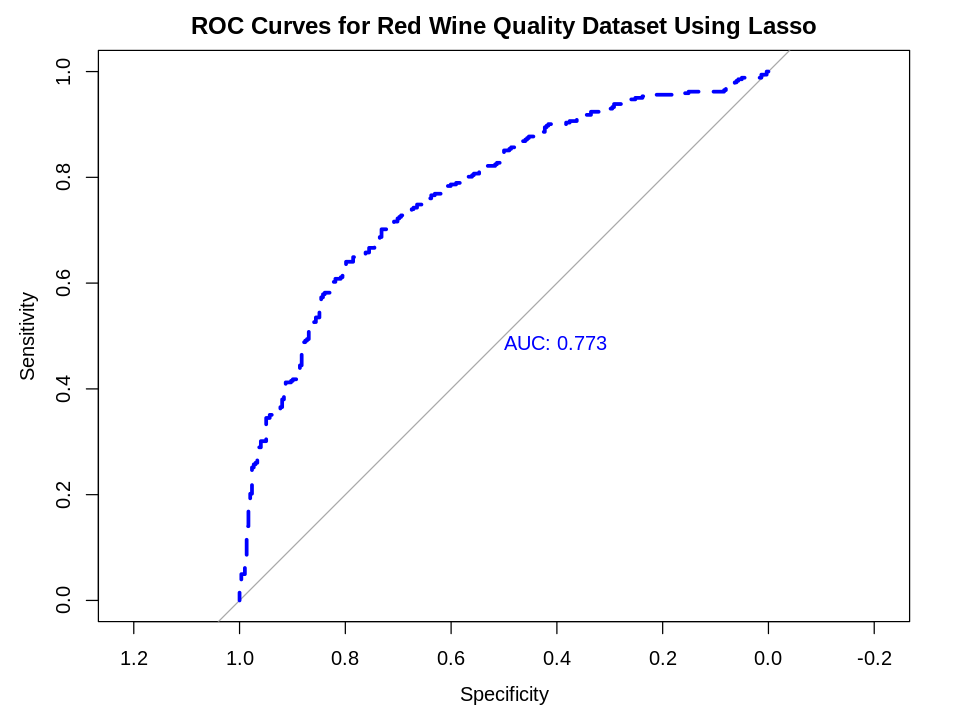

In [60]:
options(repr.plot.width = 8, repr.plot.height = 6) # Adjust these numbers so the plot looks good in your desktop.
# your code here
plot(ROC_lasso,
  print.auc = TRUE, col = "blue", lwd = 3, lty = 2,
  main = "ROC Curves for Red Wine Quality Dataset Using Lasso"
)

## Citations


[1] Cortez, P., Cerdeira, A., Almeida, F., Telmo Matos, T., &amp; Jos´e Reis, J. (n.d.). Modeling wine preferences by data mining from physicochemical ... - uminho. http://www3.dsi.uminho.pt/pcortez/wine5.pdf 


[2] Wikimedia Foundation. (2023, February 17). Acids in wine. Wikipedia. https://en.wikipedia.org/wiki/Acids_in_wine 

[3] Puckette, M. (n.d.). What is residual sugar in wine?. Wine Folly. https://winefolly.com/deep-dive/what-is-residual-sugar-in-wine/ 

[4] Mantech. (2017 July). Application note #105 – chloride in wine by titration. https://mantech-inc.com/wp-content/uploads/2014/07/105-Chloride-in-Wine-by-Titration.pdf 

[5] Moroney, M. (2018, February 27). Total sulfur dioxide – why it matters, too!. Midwest Grape and Wine Industry Institute. https://www.extension.iastate.edu/wine/total-sulfur-dioxide-why-it-matters-too/ 

[6] Connect With Us. (n.d.). Testing the ph value of wine from Cole-Parmer. https://www.coleparmer.com/tech-article/measuring-ph-in-wine-making 

[7] Christine Mikstas, C. (2023, July 10). Why there are sulfites in wine and how they could affect you. WebMD. https://www.webmd.com/diet/what-to-know-sulfites-in-wine 

[8] Howes, L. (2020, April 20). Understanding sulfur levels in wine. WineShop At Home. https://www.wineshopathome.com/understanding-sulfur-levels-wine/#:~:text=Free%20Sulfur%20or%20FSO2&amp;text=The%20term%20%E2%80%9Ctotal%20SO2%E2%80%9D%20refers,how%20much%20SO2%20to%20add. 